In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.stats import multivariate_normal

In [2]:
@njit
def v(x,y):
    return np.exp(-((x-y-1)**4 + np.abs(x+y-6)))

def accept(x1,y1,x2,y2,sigma):
    
    prop = v(x2,y2) * multivariate_normal.pdf([x1,y1], mean = [x2,y2], cov = sigma)
    current = v(x1,y1) *  multivariate_normal.pdf([x2,y2], mean = [x1,y1], cov = sigma)
    ratio = prop / current

    prob = np.min([1, ratio])

    if prob >= np.random.rand():
        return np.array([x2,y2]), prob, 1
    else:
        return np.array([x1,y1]), prob, 0
    
def metropolis_hastings(steps,sigma=1,x0=0,y0=0):
    samples = np.zeros((steps+1,2))
    probs = np.zeros(steps)
    samples[0] = np.array([x0,y0])

    accepted = 0
    for i in range(steps):
        x = samples[i,0]
        y = samples[i,1]
        x_prop = np.random.normal(x,sigma)
        y_prop = np.random.normal(y,sigma)

        samples[i+1], probs[i], a = accept(x,y,x_prop,y_prop,sigma)
        accepted += a

    print(accepted/steps)

    return samples, probs

def moving_average(data, window_size):
    """
    Calculate the moving average of a 1D array.

    Parameters:
    - data (numpy array or list): The input array.
    - window_size (int): The size of the moving average window.

    Returns:
    - numpy array: The moving average of the input array.
    """
    if len(data) < window_size:
        raise ValueError("Window size should be less than or equal to the length of the data.")

    # Use numpy's convolve function to calculate the moving average
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

In [6]:
samples, probs = metropolis_hastings(100_000, sigma=1)

0.326


In [7]:
xs = np.linspace(0,6,120)
ys = np.linspace(0,5,100)
grid = np.zeros((100,120))

for i,x in enumerate(xs):
    for j,y in enumerate(ys):
        grid[j,i] = v(x,y)

(0.0, 5.0)

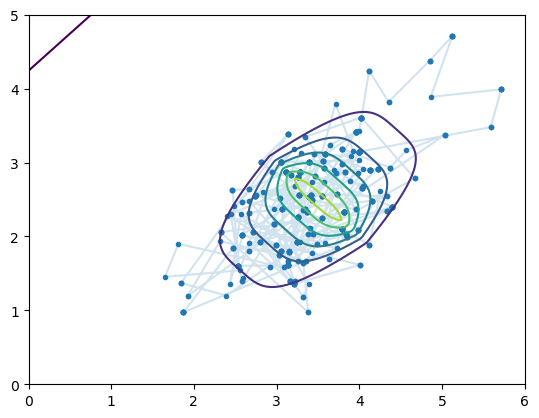

In [8]:
X, Y = np.meshgrid(xs,ys)

plt.plot(samples[10_000:10_500,0],samples[10_000:10_500,1], alpha = 0.2)
plt.contour(X, Y, grid)
plt.scatter(samples[10_000:10_500,0],samples[10_000:10_500,1], marker = '.')
plt.xlim([0,6])
plt.ylim([0,5])

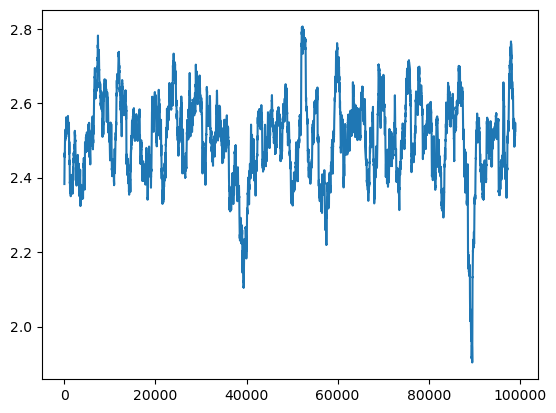

In [9]:
plt.plot(moving_average(samples[:,1], 1000))

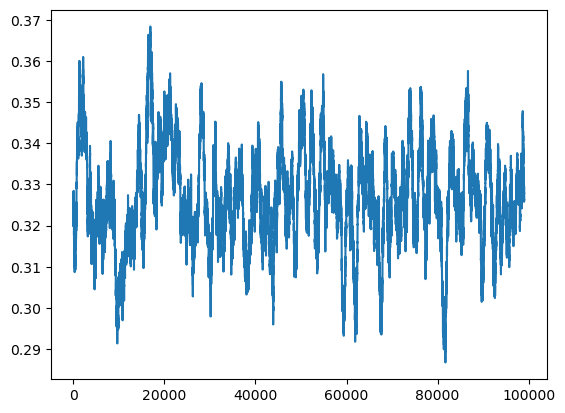

In [13]:
plt.plot(moving_average(probs,1000))